<a href="https://colab.research.google.com/github/matteeussPei/reservas_de_hotel/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# Importação das bibliotecas necessárias para a análise de dados e visualização

import pandas as pd # Pandas é utilizado para manipulação e análise de dados
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados baseada em Matplotlib
import matplotlib.pyplot as plt # Matplotlib é uma biblioteca de visualização de dados
import numpy as np # Numpy é uma biblioteca para computação numérica
from datetime import datetime # Datetime é utilizado para manipulação de datas e horas

from pandas.plotting import scatter_matrix # Scatter_matrix é utilizado para criação de matrizes de dispersão, úteis na análise exploratória
import warnings # Warnings é utilizado para controle de alertas/avisos, aqui configurado para ignorar avisos

import os
from IPython.core.pylabtools import print_figure
from IPython import get_ipython

warnings.filterwarnings("ignore")

In [144]:
# configurar as cores que usarei no plot
AZUL = "#003F5c"
COMPLEMENTAR = '#F74917'
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"

## Dicionário

* `hotel` - dois tipos de hotel, Resort Hotel e City Hotel.
* `is_canceled` - indica se a reserva foi cancelada (1) ou não (0)
* `lead_time` - número de dias transcorridos entre a data de entrada da reserva no sistema e a data de chegada ao hotel
* `arrival_date_year` - ano da data de chegada
* `arrival_date_month` - mês da data de chegada
* `arrival_date_week_number` - número da semana da data de chegada
* `arrival_date_day_of_month` - dia do mês da data de chegada
* `stays_in_weekend_nights` - número de noites de fim de semana (sábado ou domingo) em que o hóspede ficou ou reservou para ficar no hotel.
* `stays_in_week_nights` - número de noites da semana (segunda a sexta) em que o hóspede ficou ou reservou para ficar no hotel.
* `adults` - número de adultos
* `children` - número de crianças
* `babies` - número de bebês
* `meal` - tipo de refeição reservada.
* `country` - país de origem
* `market_segment` - segmento de mercado
* `distribution_channel` - canal de distribuição da reserva.
* `is_repeated_guest` - valor indicando se o nome da reserva foi de um convidado repetido (1) ou não (0)
* `previous_cancellations` - número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual      
* `previous_bookings_not_canceled` - número de reservas anteriores que não foram canceladas pelo cliente antes da reserva atual
* `reserved_room_type` - código do tipo de quarto reservado.
* `assigned_room_type` - código para o tipo de quarto designado para a reserva.           
* `booking_changes` - número de mudanças/alterações feitas na reserva desde o momento em que a reserva foi inserida no sistema até o momento do check-in ou cancelamento.
* `deposit_type` - indicação sobre se o cliente fez um depósito para garantir a reserva.               
* `agent` -  ID da agência de viagens que fez a reserva
* `company` - ID da empresa/entidade que fez a reserva ou responsável pelo pagamento da reserva.               
* `days_in_waiting_list` - Número de dias em que a reserva estava na lista de espera antes de ser confirmada ao cliente            
* `customer_type` - tipo da reserva.           
* `adr` - taxa diária média                             
* `required_car_parking_spaces` - número de vagas de estacionamento necessárias para o cliente  
* `total_of_special_requests` - número de pedidos especiais feitos pelo cliente     
* `reservation_status` - status da reserva       
* `reservation_status_date` - data na qual o último status foi definido.

## Importação do arquivo

In [145]:
# Carregamento do dataset de reservas de hotéis
df = pd.read_csv('https://raw.githubusercontent.com/matteeussPei/reservas_de_hotel/main/hotel_bookings.csv')

# Visualização das primeiras linhas do dataset para entender a estrutura dos dados
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Análise Introdutória

In [146]:
# Exibição do número total de variáveis (colunas) e entradas (linhas) no dataset
print('Total de variáveis:', df.shape[1])
print('Total de entradas:', df.shape[0])

Total de variáveis: 32
Total de entradas: 119390


In [147]:
# Saber como as variáveis estão distribuidas
df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

In [148]:
# Quantidade de valores ausentes
pd.DataFrame({'dados_ausentes(%)': (df.isnull().sum()/df.shape[0])*100}).sort_values('dados_ausentes(%)', ascending=False)


,dados_ausentes(%)
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
reserved_room_type,0.000000
assigned_room_type,0.000000
booking_changes,0.000000
deposit_type,0.000000
hotel,0.000000
previous_cancellations,0.000000


## Transformação dos dados

In [149]:
# A variável 'company' é praticamente nula, será desconsiderada em nossa análise;
# assim como a coluna 'agent', pois se trata do ID da agência de viagens que fez a reserva.
df.drop(columns = ['agent', 'company', 'arrival_date_year'], inplace=True)

In [150]:
# Os valores ausentes nas colunas 'country' e 'children' serão preenchidos com a moda e mediana.

df['country'].fillna(df['country'].mode()[0],inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)

In [151]:
# contabilizar o total de dias de cada reserva
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.drop(columns = ['stays_in_week_nights', 'stays_in_weekend_nights'], inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days
0,Resort Hotel,0,342,July,27,1,2,0.0,0,BB,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,July,27,1,2,0.0,0,BB,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,July,27,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,July,27,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,July,27,1,2,0.0,0,BB,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [152]:
# Apagar registros duplicados
df.drop_duplicates(inplace=True)

In [153]:
# filtro para que reservas onde a quantidade de adultos, crianças e bebes fosse iguais a zero
filtro = (df['babies'] == 0) & (df['children'] == 0) & (df['adults'] == 0)
df = df[~filtro]

In [154]:
#substituindo os codigos

#replace Undefined, BB, FB, HB, SC to its meaning.
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'],
                   [ 'No Meal', 'Breakfast', 'Full Board', 'Half Board', 'No Meal'],
                   inplace = True)


In [155]:
# lendo arquivo que será usada para substituir as sigalas dos países no dataframe df
countries_code = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
countries_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [156]:
# dicionário para obter apenas duas colunas do datraframe countries_code
dict_country= {}
for i,j in zip(countries_code['alpha-3'], countries_code['name']):
    dict_country[i] = j

In [157]:
# substituindo as siglas por nomes
df['country'].replace(dict_country, inplace= True)

In [158]:
# apenas abreviando para fins estéticos
df['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)
df['country'].replace('Netherlands, Kingdom of the', 'Netherlands', inplace = True)

# Análise Exploratória e Visualização

> Após o tratamento de dados realizado, podemos agora fazer uma análise exploratória e retirar insights.

## Hotel com maior número de reservas.

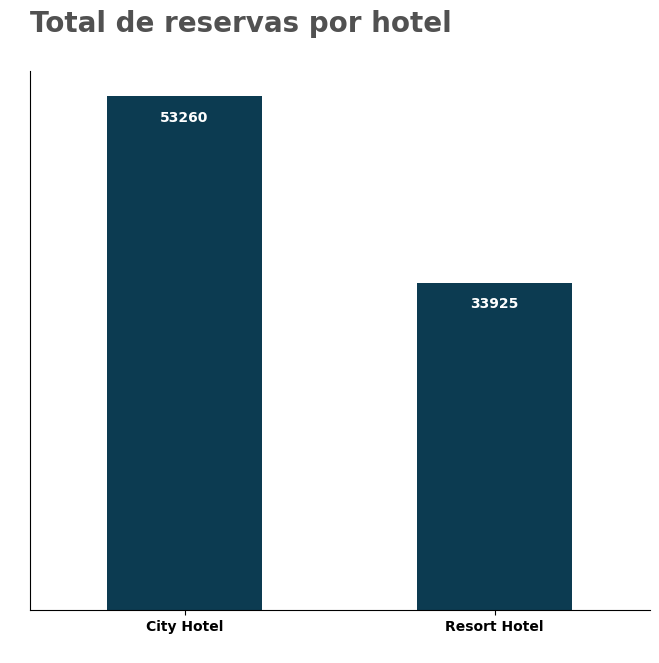

In [159]:
fig, ax = plt.subplots(figsize=(8,7), dpi = 100)
sns.countplot(x='hotel', data = df, dodge = True, linewidth =1 , width=.5, color = AZUL, order=df['hotel'].value_counts().index)
plt.xlabel(' ')
plt.ylabel(' ')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])


ax.text(-0.5,60000, 'Total de reservas por hotel', fontsize=20, color=CINZA_TEXTO, fontweight='bold')

# Inserindo os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding= -20, color ='white', fontweight = 'bold')

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


plt.tight_layout
plt.show();

## Quantidade cancelamentos por hotel



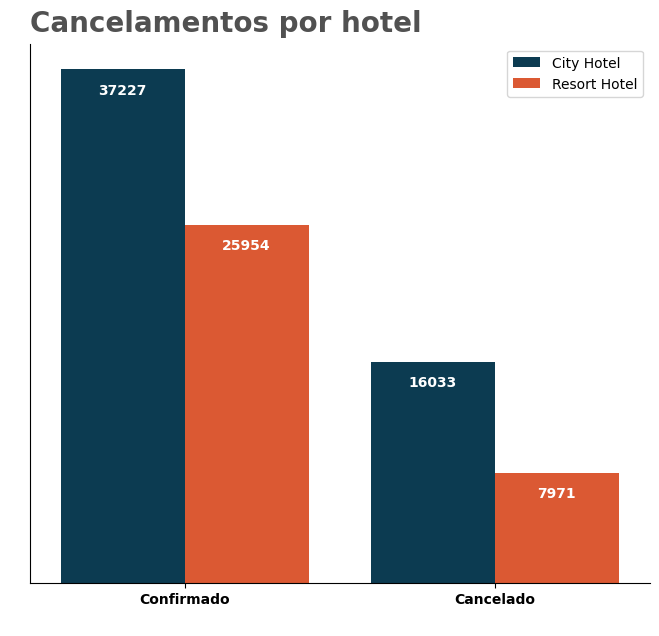

In [160]:
fig, ax = plt.subplots(figsize=(8,7), dpi = 100)

# Substituindo os valores 0 e 1 por 'Não Cancelado' e 'Cancelado'
df['is_canceled'] = df['is_canceled'].replace({0: 'Confirmado', 1: 'Cancelado'})


# Especificando as cores das barras
palette = {'City Hotel': AZUL, 'Resort Hotel': COMPLEMENTAR}

#hue order
hue_order = ['City Hotel', 'Resort Hotel']

# Plotando o gráfico de barras
sns.countplot(x = df['is_canceled'], hue = 'hotel', data = df, palette=palette, order=df['is_canceled'].value_counts().index, hue_order=hue_order)
plt.xlabel(' ')
plt.ylabel(' ')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])


#titulo
ax.text(-0.5,40000, 'Cancelamentos por hotel', fontsize=20, color=CINZA_TEXTO, fontweight='bold')

# Inserindo os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding= -20, color ='white', fontweight = 'bold')

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')

# Removendo o título da legenda
plt.legend(title='')


plt.tight_layout
plt.show();

## Origem dos hóspedes

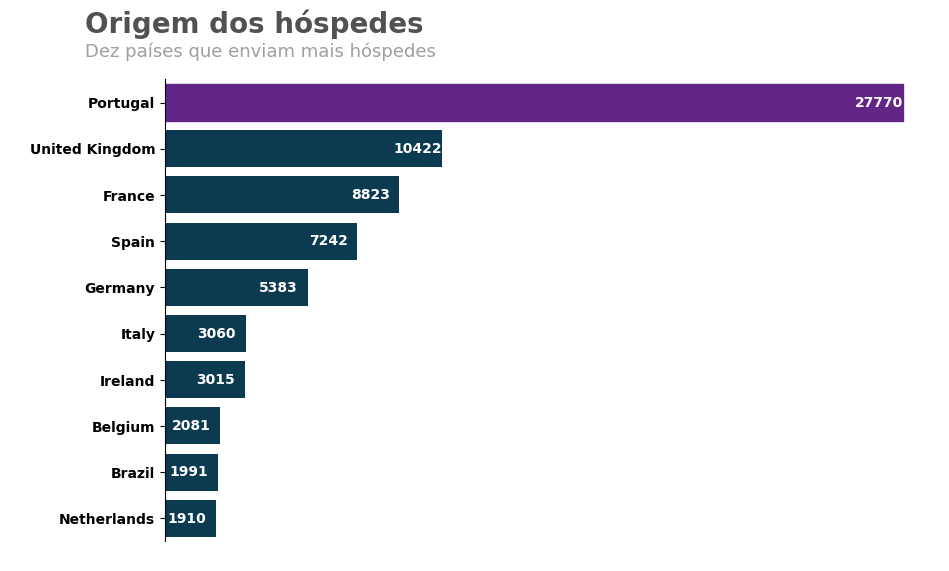

In [161]:
# Gráfico de barras mostrando a quantidade de reservas por país (os dez maiores)
fig, ax = plt.subplots(figsize=(10,6), dpi = 100)
sns.barplot(y = df['country'].value_counts().iloc[0:10].index, x = df['country'].value_counts().iloc[0:10].values, orient = 'h', color = AZUL, ax = ax)

# Mudando a cor da primeira barra
bars = ax.patches
bars[0].set_color('#632686')


#titulo
ax.text(-3000,-1.5, 'Origem dos hóspedes', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-3000, -1,'Dez países que enviam mais hóspedes', fontsize=13, color=CINZA)

# Retirando nome dos eixos
plt.xlabel(' ')
plt.ylabel(' ')

# remover yticks e yticklabels
ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

# Inserindo os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding= -35, color ='white', fontweight = 'bold')

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Colocando os rótulos do eixo x em negrito
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


plt.tight_layout
plt.show();

## Efeito do hospede repetido nos cancelamentos

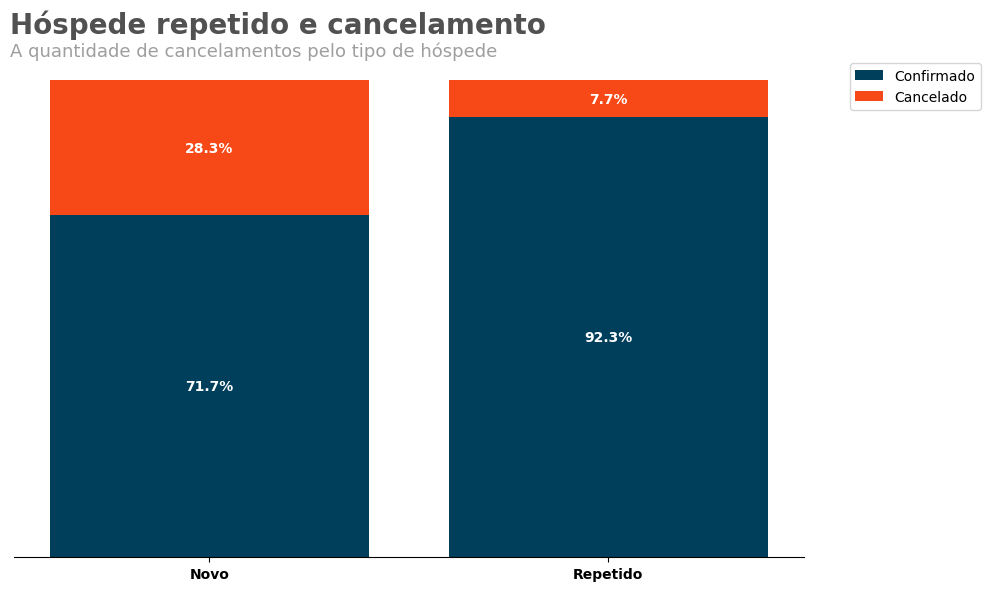

In [162]:
# Convertendo os dados em um DataFrame
df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: 'Novo', 1: 'Repetido'})

df_novo = pd.Series(df.groupby('is_repeated_guest')['is_canceled'].value_counts()).unstack().fillna(0)

# Reordenando as colunas
df_counts = df_novo[['Confirmado', 'Cancelado']]

# Normalizando os dados para obter porcentagens
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

palette = {'Confirmado': AZUL, 'Cancelado': COMPLEMENTAR}

# Criando o gráfico empilhado
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)

# Plotando as barras empilhadas
bottom = [0] * len(df_percent.index)
for hotel in df_percent.columns:
    values = df_percent[hotel]
    ax.bar(df_percent.index, values, bottom=bottom, label=hotel, color=palette[hotel])
    bottom = [i+j for i, j in zip(bottom, values)]

    # Adicionando os valores nas barras
    for i, (v, b) in enumerate(zip(values, bottom)):
        if v > 0:  # Para evitar adicionar rótulos de zero
            ax.text(i, b - v/2, f'{v:.1f}%', ha='center', va='center', color='white', fontweight='bold')

# Ajustando os rótulos
plt.xlabel('')
plt.ylabel('')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#titulo
ax.text(-0.5,110, 'Hóspede repetido e cancelamento', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.5,105, 'A quantidade de cancelamentos pelo tipo de hóspede', fontsize=13, color=CINZA)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(df_percent.index, fontweight='bold')

# Removendo o título da legenda
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrando o gráfico
plt.tight_layout()
plt.show();


## Refeição Reservada


In [163]:
confirmed = df.loc[df['is_canceled'] == 'Confirmado']

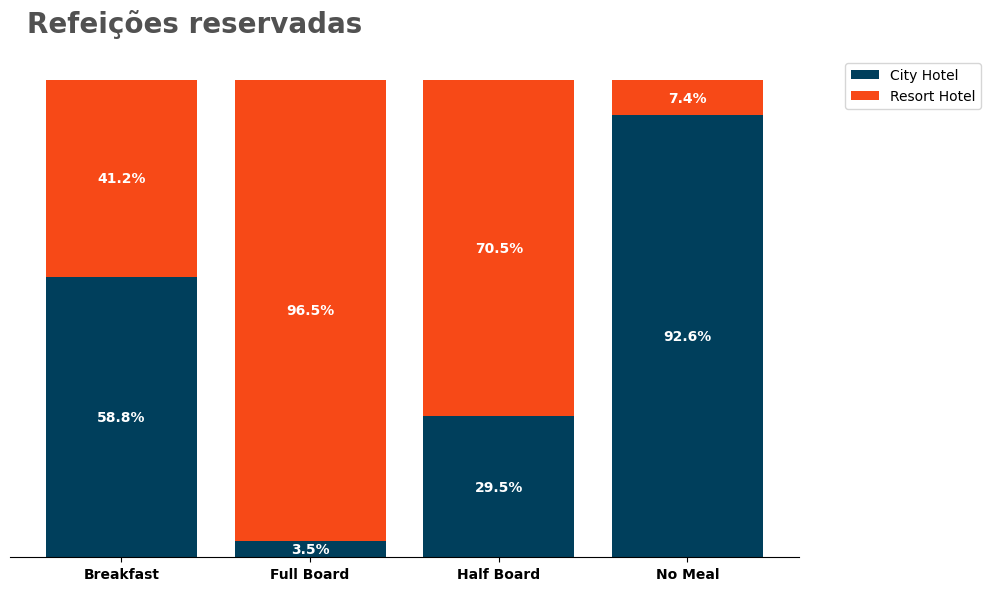

In [164]:
# Criando o gráfico empilhado
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)

# Convertendo os dados em um DataFrame
df_novo = pd.Series(confirmed.groupby('meal')['hotel'].value_counts()).unstack().fillna(0)

# Normalizando os dados para obter porcentagens
df_percent = df_novo.div(df_novo.sum(axis=1), axis=0) * 100

palette = {'City Hotel': AZUL, 'Resort Hotel': COMPLEMENTAR}

# Plotando as barras empilhadas
bottom = [0] * len(df_percent.index)
for hotel in df_percent.columns:
    values = df_percent[hotel]
    ax.bar(df_percent.index, values, bottom=bottom, label=hotel, color=palette[hotel])
    bottom = [i+j for i, j in zip(bottom, values)]

    # Adicionando os valores nas barras
    for i, (v, b) in enumerate(zip(values, bottom)):
        if v > 0:  # Para evitar adicionar rótulos de zero
            ax.text(i, b - v/2, f'{v:.1f}%', ha='center', va='center', color='white', fontweight='bold')

# Ajustando os rótulos
plt.xlabel('')
plt.ylabel('')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#titulo
ax.text(-0.5,110, 'Refeições reservadas', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.5,110, '', fontsize=13, color=CINZA)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(df_percent.index, fontweight='bold')

# Removendo o título da legenda
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrando o gráfico
plt.tight_layout()
plt.show();

## Meses com mais reservas

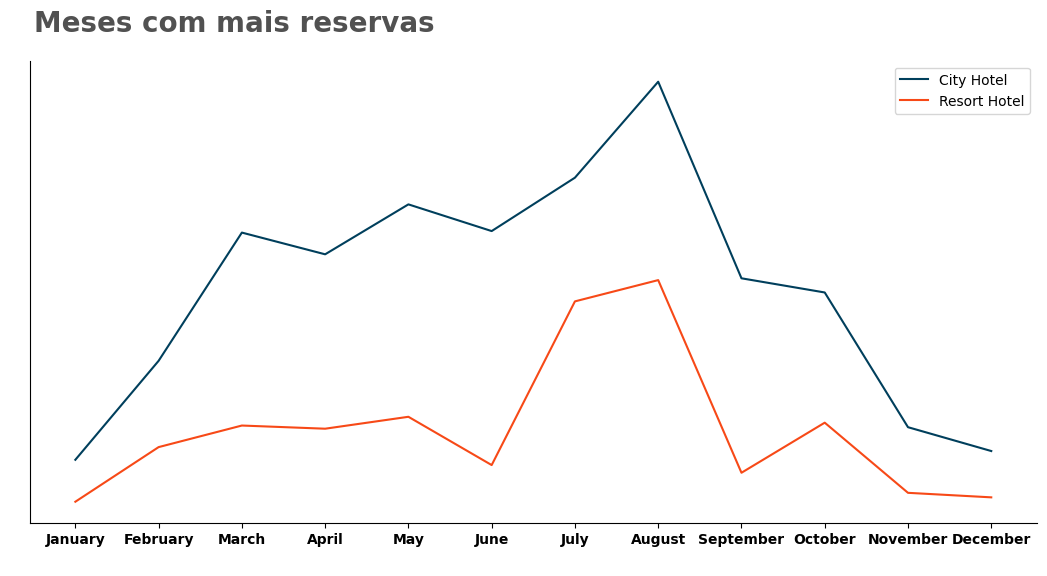

In [165]:
fig, ax = plt.subplots(figsize=(13,6))

# Especificando as cores das barras
palette = {'City Hotel': AZUL, 'Resort Hotel': COMPLEMENTAR}

# Contando o número de chegadas por mês para cada hotel
arrival_counts = confirmed.groupby(['hotel', 'arrival_date_month']).size().unstack()

# Redefinindo a ordem dos meses
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_counts = arrival_counts[months_order]

# Plotando as linhas
sns.lineplot(data=arrival_counts.T, dashes = False, palette=palette)


# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

#remover xlabel e ylabel
plt.xlabel(' ')
plt.ylabel(' ')


#titulo
ax.text(-0.5,4800, 'Meses com mais reservas', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.5,4800, '', fontsize=13, color=CINZA)

# Inserindo os valores nas barras
#for container in ax.containers:
    #ax.bar_label(container, padding= -20, color ='white', fontweight = 'bold')

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')

# Removendo o título da legenda
plt.legend(title='')


plt.tight_layout;
plt.show();

## Preço médio durante o ano

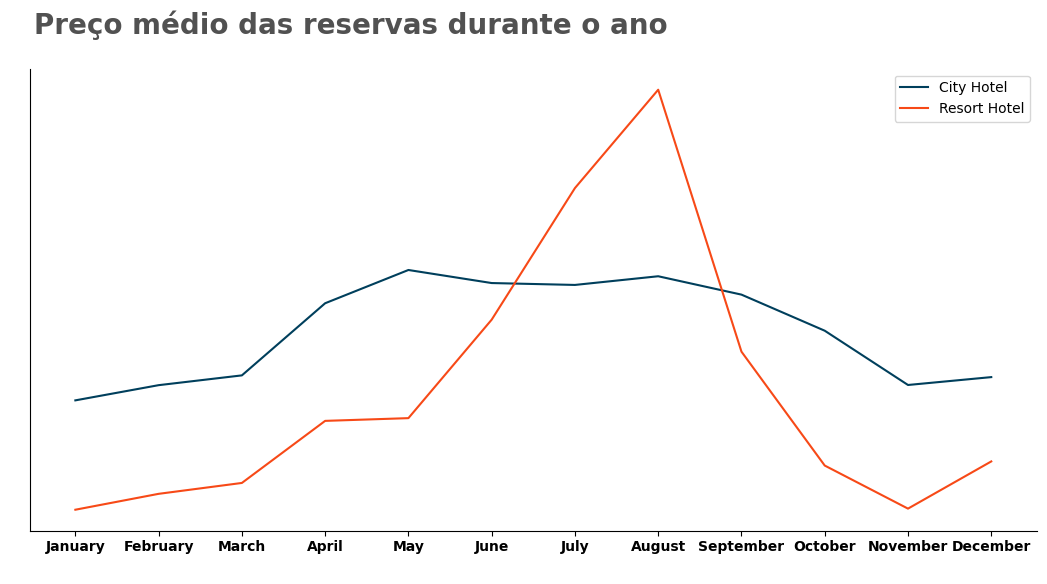

In [166]:
fig, ax = plt.subplots(figsize=(13,6))

# Especificando as cores das barras
palette = {'City Hotel': AZUL, 'Resort Hotel': COMPLEMENTAR}

# preço médio de cada hotel por mês
preco_medio = confirmed.groupby(['hotel', 'arrival_date_month'])['adr'].mean().round(2).unstack()

# Redefinindo a ordem dos meses
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
preco_medio = preco_medio[months_order]

# Plotando as linhas
sns.lineplot(data=preco_medio.T, dashes = False, palette=palette)


# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

#remover xlabel e ylabel
plt.xlabel(' ')
plt.ylabel(' ')


#titulo
ax.text(-0.5,200, 'Preço médio das reservas durante o ano', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.5,80, '', fontsize=13, color=CINZA)

# Inserindo os valores nas barras
#for container in ax.containers:
    #ax.bar_label(container, padding= -20, color ='white', fontweight = 'bold')

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')

# Removendo o título da legenda
plt.legend(title='')


plt.tight_layout;
plt.show();

## Reservas realizadas por segmentos

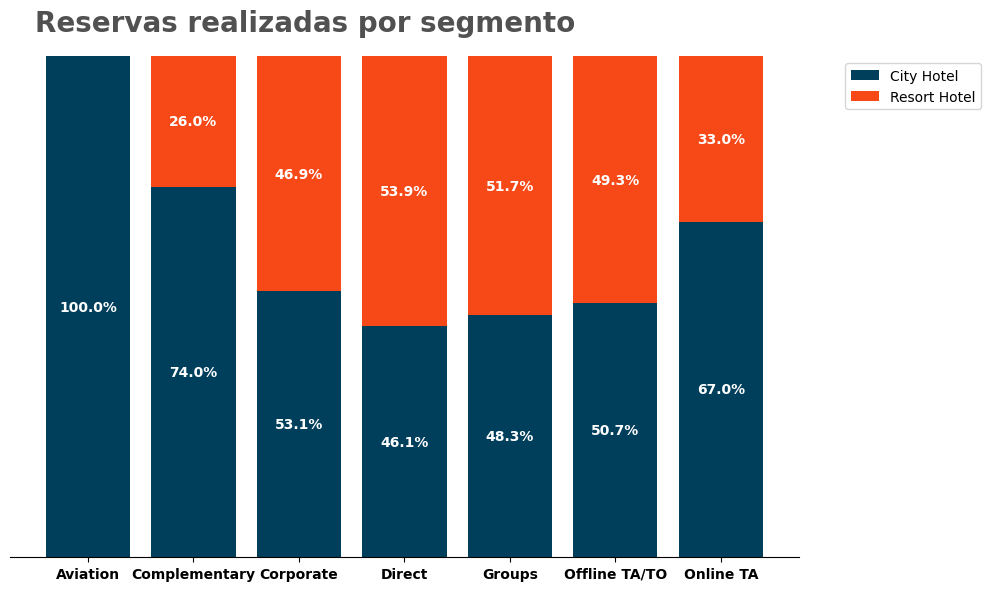

In [167]:
# Convertendo os dados em um DataFrame
df = pd.Series(confirmed.groupby('market_segment')['hotel'].value_counts()).unstack().fillna(0)

# Normalizando os dados para obter porcentagens
df_percent = df.div(df.sum(axis=1), axis=0) * 100

# Criando o gráfico empilhado
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)

# Plotando as barras empilhadas
bottom = [0] * len(df_percent.index)
for hotel in df_percent.columns:
    values = df_percent[hotel]
    ax.bar(df_percent.index, values, bottom=bottom, label=hotel, color=palette[hotel])
    bottom = [i+j for i, j in zip(bottom, values)]

    # Adicionando os valores nas barras
    for i, (v, b) in enumerate(zip(values, bottom)):
        if v > 0:  # Para evitar adicionar rótulos de zero
            ax.text(i, b - v/2, f'{v:.1f}%', ha='center', va='center', color='white', fontweight='bold')

# Ajustando os rótulos
plt.xlabel('')
plt.ylabel('')

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#titulo
ax.text(-0.5,105, 'Reservas realizadas por segmento', fontsize=20, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.5,80, '', fontsize=13, color=CINZA)

# Colocando os rótulos do eixo x em negrito
ax.set_xticklabels(df_percent.index, fontweight='bold')

# Removendo o título da legenda
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrando o gráfico
plt.tight_layout()
plt.show();